## 퍼셉트론
- 퍼셉트론 : 고전적인 인공 신경망 알고리즘
- y = ax+b

In [65]:
import numpy as np
import matplotlib.pyplot as plt

In [66]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=10):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None  # == a
        self.bias = None  # == b

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, sample in enumerate(X):
                linear_output = (
                    np.dot(sample, self.weights) + self.bias
                )  # dot : 내적 / 이 값이 일차함수 선형 함수가 된다.
                y_predicted = self.activation_function(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)  # 잔차
                self.weights += update * sample
                self.bias += update

    def activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.activation_function(linear_output)

In [67]:
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k", marker="o")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Perceptron Decision Boundary (AND)")
    plt.show()

In [68]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])

In [69]:
model = Perceptron()

In [70]:
model.fit(X, y)

In [71]:
model.predict(X)

array([0, 1, 1, 1])

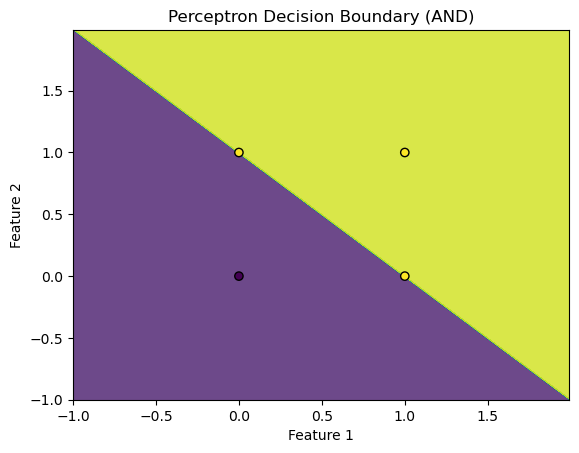

In [72]:
plot_decision_boundary(X, y, model)

In [75]:
# Import Package
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
    y_min, y_max = X[:, 1].min() -1, X[:, 1].max() +1 # 그래프 상에서 점들이 잘 보이도록 점들보다 넓은 그래프 범위 설정
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = (Z > 0.5).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Neural Network Decision Boundary (XOR)')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
예측 결과:
 [[0]
 [1]
 [1]
 [0]]
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 305us/step


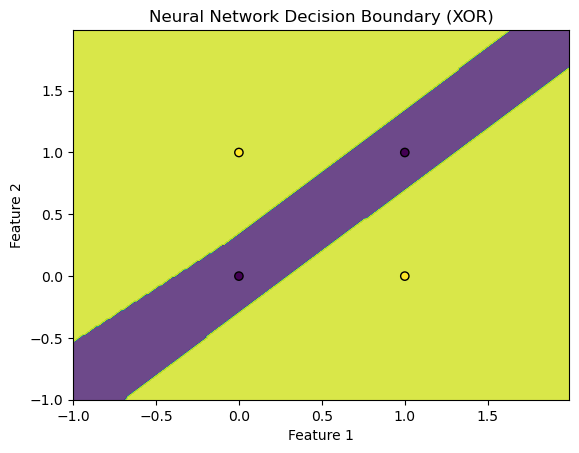

In [76]:
# XOR 게이트
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# MLP 모델 정의
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu'))  # 입력층
model.add(Dense(4, activation='relu'))  # 은닉층
model.add(Dense(1, activation='sigmoid'))  # 출력층
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])  # 컴파일

model.fit(X, y, epochs=2000, verbose=0)  # 다층 퍼셉트론 학습시키기

predictions = model.predict(X)  # 예측
predictions = (predictions > 0.5).astype(int)  # 이진 데이터로 변환
print("예측 결과:\n", predictions)

plot_decision_boundary(model, X, y)  # 시각화